# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
# YOUR CODE HERE!
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"


In [5]:
import json
resp_data_btc = requests.get(btc_url)
resp_data_eth = requests.get(eth_url)
print(resp_data_btc)
print(resp_data_eth)

<Response [200]>
<Response [200]>


In [6]:
resp_data_btc = requests.get(btc_url).json()
print(json.dumps(resp_data_btc, indent=1))

{
 "data": {
  "1": {
   "id": 1,
   "name": "Bitcoin",
   "symbol": "BTC",
   "website_slug": "bitcoin",
   "rank": 1,
   "circulating_supply": 18609643,
   "total_supply": 18609643,
   "max_supply": 21000000,
   "quotes": {
    "USD": {
     "price": 32774.0,
     "volume_24h": 46595785215,
     "market_cap": 609920350527,
     "percentage_change_1h": 0.0282638966081388,
     "percentage_change_24h": 2.07813492418678,
     "percentage_change_7d": -8.46222897218242,
     "percent_change_1h": 0.0282638966081388,
     "percent_change_24h": 2.07813492418678,
     "percent_change_7d": -8.46222897218242
    },
    "CAD": {
     "price": 41645.9218,
     "volume_24h": 59209264272.7005,
     "market_cap": 775025789414.658,
     "percent_change_1h": 0.0282638966081388,
     "percent_change_24h": 2.07813492418678,
     "percent_change_7d": -8.46222897218242
    }
   },
   "last_updated": 1611544151
  }
 },
 "metadata": {
  "timestamp": 1611544151,
  "num_cryptocurrencies": 1385,
  "error": nul

In [7]:
BTC_price = resp_data_btc["data"]["1"]["quotes"]["USD"]["price"]
print(f"Bitcoin current price is $ {BTC_price}")

Bitcoin current price is $ 32774.0


In [8]:
resp_data_eth = requests.get(eth_url).json()
print(json.dumps(resp_data_eth, indent=1))

{
 "data": {
  "1027": {
   "id": 1027,
   "name": "Ethereum",
   "symbol": "ETH",
   "website_slug": "ethereum",
   "rank": 2,
   "circulating_supply": 114391520,
   "total_supply": 114391520,
   "max_supply": 0,
   "quotes": {
    "USD": {
     "price": 1431.72,
     "volume_24h": 46141382940,
     "market_cap": 163656790289,
     "percentage_change_1h": 0.453332631020571,
     "percentage_change_24h": 13.5619520686937,
     "percentage_change_7d": 16.4591167211577,
     "percent_change_1h": 0.453332631020571,
     "percent_change_24h": 13.5619520686937,
     "percent_change_7d": 16.4591167211577
    },
    "CAD": {
     "price": 1819.286604,
     "volume_24h": 58631855301.858,
     "market_cap": 207958683420.232,
     "percent_change_1h": 0.453332631020571,
     "percent_change_24h": 13.5619520686937,
     "percent_change_7d": 16.4591167211577
    }
   },
   "last_updated": 1611544132
  }
 },
 "metadata": {
  "timestamp": 1611544132,
  "num_cryptocurrencies": 1385,
  "error": null
 

In [9]:
ETH_price = resp_data_eth["data"]["1027"]["quotes"]["USD"]["price"]
print(f"Ethereum current price is $ {ETH_price}")

Ethereum current price is $ 1431.72


In [10]:
# Fetch current BTC price
BTC_price = resp_data_btc["data"]["1"]["quotes"]["USD"]["price"]

# Fetch current ETH price
ETH_price = resp_data_eth["data"]["1027"]["quotes"]["USD"]["price"]

# Compute current value of my crpto
# YOUR CODE HERE!
my_btc_value = my_btc * BTC_price
my_eth_value = my_eth * ETH_price
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $39328.80
The current value of your 5.3 ETH is $7588.12


In [11]:
CRYPTO_VALUE = round(my_btc_value + my_eth_value, 2)
print(f"Total CRYPTO_VALUE = {CRYPTO_VALUE}")

Total CRYPTO_VALUE = 46916.92


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [12]:
# Current amount of shares
my_spy = 50
my_agg = 200

In [13]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")


# Create the Alpaca API object
# YOUR CODE HERE!
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [14]:
# Format current date as ISO format
today = pd.Timestamp("2021-01-21", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_portfolio = api.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Preview DataFrame
df_portfolio

AGG                                        SPY  \
                             open      high     low   close   volume    open   
time                                                                           
2021-01-21 00:00:00-05:00  117.22  117.2985  117.14  117.26  5801029  384.49   

                                                            
                             high     low  close    volume  
time                                                        
2021-01-21 00:00:00-05:00  384.95  383.25  384.2  41800991

In [15]:
# Pick AGG and SPY close prices
agg_close_price = float(df_portfolio["AGG"]["close"])
spy_close_price = float(df_portfolio["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $117.26
Current SPY closing price: $384.2


In [16]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $19210.00
The current value of your 200 AGG shares is $23452.00


In [17]:
STOCKS_VALUE = my_spy_value + my_agg_value
print(f"Total STOCKS_VALUE = {STOCKS_VALUE}")

Total STOCKS_VALUE = 42662.0


### Savings Health Analysis

In [18]:
# Set monthly household income
monthly_income = 12000

# Create savings DataFrame
# Set current amount of shares data
savings = {
    "amount": [STOCKS_VALUE, CRYPTO_VALUE]
}

# Set the tickers
tickers = ["Shares", "Crypto"]

# Create the shares DataFrame
df_savings = pd.DataFrame(savings, index=tickers)


# Display savings DataFrame
display(df_savings)

,amount
Shares,42662.00
Crypto,46916.92


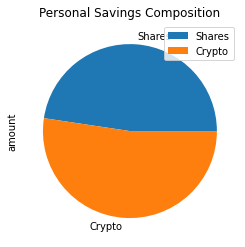

In [19]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title="Personal Savings Composition");

In [20]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3
print(f"The ideal emergency fund = ${emergency_fund}")

# Calculate total amount of savings
# YOUR CODE HERE!
total_amount_of_savings = STOCKS_VALUE + CRYPTO_VALUE
print(f"The total amount of savings = ${total_amount_of_savings}")

under_goal = emergency_fund-total_amount_of_savings


# Validate saving health
if total_amount_of_savings > emergency_fund:
    print("CONGRATULATIOS!!! You have enough money in this fund!!!")
elif total_amount_of_savings == emergency_fund:
    print("CONGRATULATIOS for reaching this financial goal!")
else:
    print(f"By now you are {emergency_fund-total_amount_of_savings} away from reaching your goal")
    


The ideal emergency fund = $36000
The total amount of savings = $89578.92
CONGRATULATIOS!!! You have enough money in this fund!!!


#### The ideal emergency fund = $36,000.00 

#### The total amount of savings = $87,879.78

#### CONGRATULATIOS!!! You have enough money in this fund!!!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [21]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-01-21', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-01-21', tz='America/New_York').isoformat()

In [22]:
# Get 5 years' worth of historical data for SPY and AGG
# Set the tickers
tickers2 = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe2 = "1D"

df_stock_data = api.get_barset(
    tickers2,
    timeframe2,
    start=start_date,
    end=end_date
).df

# Display sample data
df_stock_data.head()

AGG                                         SPY  \
                             open     high       low   close   volume    open   
time                                                                            
2016-01-21 00:00:00-05:00  109.08  109.080  108.7400  108.78  6927926  186.21   
2016-01-22 00:00:00-05:00  108.72  108.850  108.5850  108.82  2980878  189.78   
2016-01-25 00:00:00-05:00  108.95  108.980  108.7700  108.79  3120189  189.93   
2016-01-26 00:00:00-05:00  108.90  108.995  108.7699  108.90  2023631  188.42   
2016-01-27 00:00:00-05:00  108.91  109.010  108.7200  108.95  1531148  189.58   

                                                              
                             high     low   close     volume  
time                                                          
2016-01-21 00:00:00-05:00  188.87  184.64  186.68  154918462  
2016-01-22 00:00:00-05:00  190.76  188.88  190.49  132418951  
2016-01-25 00:00:00-05:00  190.15  187.41  187.66   99219694  
2016-01-26 00:00:00-05:00  190.53  188.02  190.18  115312517  
2016-01-27 00:00:00-05:00  191.56  187.06  188.12  157060622

In [23]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
num_sims = 500

Shares_portfolio_30y = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = num_sims,
    num_trading_days = 252*30)


In [24]:
# Printing the simulation input data
Shares_portfolio_30y.portfolio_data.head()

AGG                                      \
                             open     high       low   close   volume   
time                                                                    
2016-01-21 00:00:00-05:00  109.08  109.080  108.7400  108.78  6927926   
2016-01-22 00:00:00-05:00  108.72  108.850  108.5850  108.82  2980878   
2016-01-25 00:00:00-05:00  108.95  108.980  108.7700  108.79  3120189   
2016-01-26 00:00:00-05:00  108.90  108.995  108.7699  108.90  2023631   
2016-01-27 00:00:00-05:00  108.91  109.010  108.7200  108.95  1531148   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2016-01-21 00:00:00-05:00          NaN  186.21  188.87  184.64  186.68   
2016-01-22 00:00:00-05:00     0.000368  189.78  190.76  188.88  190.49   
2016-01-25 00:00:00-05:00    -0.000276  189.93  190.15  187.41  187.66   
2016-01-26 00:00:00-05:00     0.001011  188.42  190.53  188.02  190.18   
2016-01-27 00:00:00-05:00     0.000459  189.58  191.56  187.06  188.12   

                                                   
                              volume daily_return  
time                                               
2016-01-21 00:00:00-05:00  154918462          NaN  
2016-01-22 00:00:00-05:00  132418951     0.020409  
2016-01-25 00:00:00-05:00   99219694    -0.014856  
2016-01-26 00:00:00-05:00  115312517     0.013429  
2016-01-27 00:00:00-05:00  157060622    -0.010832

In [25]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
Shares_portfolio_30y.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.007945,1.013477,0.998941,0.992450,1.009603,1.000209,1.001984,1.001190,0.997345,1.009722,...,1.004614,0.994214,0.990035,1.007879,0.998185,0.992303,0.991762,1.000777,1.011838,1.002692
2,0.996253,1.020669,0.995045,1.005457,1.010138,1.003331,0.998133,0.994471,1.009269,1.008892,...,1.011449,0.990631,0.982788,1.001875,0.995492,0.983500,0.992072,1.014097,1.015871,1.002594
3,0.993717,1.026279,0.987872,1.011416,1.021102,1.023276,0.990491,0.999716,1.024327,1.004718,...,1.025534,0.977052,0.979844,1.006514,0.996949,0.983343,0.987852,0.999720,1.021483,1.008556
4,0.983139,1.037404,0.987513,1.008093,1.011472,1.026381,0.993225,1.005774,1.030191,1.007930,...,1.025557,0.987540,0.991481,1.011786,0.989362,0.984484,0.989828,0.982614,1.009024,0.996531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,10.603279,14.247548,25.438855,15.776415,12.234525,4.751358,18.436062,58.989473,15.162235,44.403890,...,12.395352,6.410871,9.258691,19.295773,25.371403,12.683436,8.652997,18.658740,15.540500,30.170315
7557,10.540978,14.312257,25.707666,15.942611,12.267455,4.704588,18.464350,59.210708,14.961972,44.472585,...,12.352373,6.428017,9.422140,19.161126,25.411238,12.523888,8.672220,18.611832,15.646119,30.277843
7558,10.497502,14.283769,25.595087,15.913192,12.307642,4.680746,18.376163,58.867178,14.908162,44.904728,...,12.371306,6.385907,9.353637,19.175262,25.292551,12.611791,8.655315,18.635103,15.575729,30.309481
7559,10.535600,14.088964,25.521595,15.889220,12.339582,4.636994,18.165623,58.757884,14.901922,44.922835,...,12.431423,6.384304,9.326804,19.298602,25.496056,12.690841,8.643333,18.639966,15.449231,30.675595


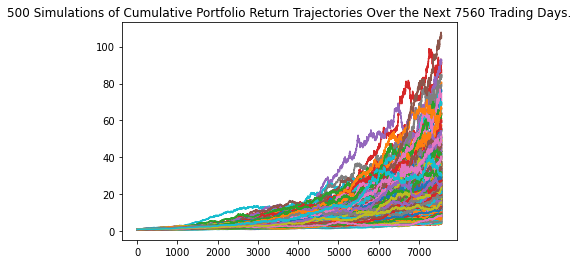

In [26]:
# Plot simulation outcomes
line_plot = Shares_portfolio_30y.plot_simulation()

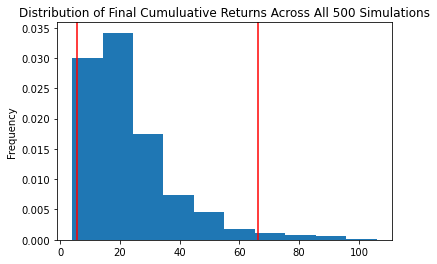

In [27]:
# Plot probability distribution and confidence intervals
dist_plot = Shares_portfolio_30y.plot_distribution()

### Retirement Analysis

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
Shares_portfolio_30y_tbl = Shares_portfolio_30y.summarize_cumulative_return()

# Print summary statistics
print(Shares_portfolio_30y_tbl)

count           500.000000
mean             23.205784
std              15.483697
min               4.042678
25%              12.920943
50%              18.859845
75%              28.867433
max             105.881214
95% CI Lower      5.761561
95% CI Upper     66.267516
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [29]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
Shares_portfolio_30y_tbl_lower = round(Shares_portfolio_30y_tbl[8]*initial_investment,2)
Shares_portfolio_30y_tbl_upper = round(Shares_portfolio_30y_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${Shares_portfolio_30y_tbl_lower} and ${Shares_portfolio_30y_tbl_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $115231.22 and $1325350.31


* initial_investment = 20000

** Shares_portfolio_30y_tbl_lower = $112379.88

** Shares_portfolio_30y_tbl_upper = $1189679.27

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [30]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
Shares_portfolio_30y_tbl_lower2 = round(Shares_portfolio_30y_tbl[8]*initial_investment,2)
Shares_portfolio_30y_tbl_upper2 = round(Shares_portfolio_30y_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${Shares_portfolio_30y_tbl_lower2} and ${Shares_portfolio_30y_tbl_upper2}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $172846.83 and $1988025.47


* initial_investment = 30000

** Shares_portfolio_30y_tbl_lower = $168569.83 

** Shares_portfolio_30y_tbl_upper = $1784518.91

## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [43]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
num_sims = 500

Shares_portfolio_5y = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.30,.70],
    num_simulation = num_sims,
    num_trading_days = 252*5)

In [44]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
Shares_portfolio_5y.portfolio_data.head()

AGG                                      \
                             open     high       low   close   volume   
time                                                                    
2016-01-21 00:00:00-05:00  109.08  109.080  108.7400  108.78  6927926   
2016-01-22 00:00:00-05:00  108.72  108.850  108.5850  108.82  2980878   
2016-01-25 00:00:00-05:00  108.95  108.980  108.7700  108.79  3120189   
2016-01-26 00:00:00-05:00  108.90  108.995  108.7699  108.90  2023631   
2016-01-27 00:00:00-05:00  108.91  109.010  108.7200  108.95  1531148   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2016-01-21 00:00:00-05:00          NaN  186.21  188.87  184.64  186.68   
2016-01-22 00:00:00-05:00     0.000368  189.78  190.76  188.88  190.49   
2016-01-25 00:00:00-05:00    -0.000276  189.93  190.15  187.41  187.66   
2016-01-26 00:00:00-05:00     0.001011  188.42  190.53  188.02  190.18   
2016-01-27 00:00:00-05:00     0.000459  189.58  191.56  187.06  188.12   

                                                   
                              volume daily_return  
time                                               
2016-01-21 00:00:00-05:00  154918462          NaN  
2016-01-22 00:00:00-05:00  132418951     0.020409  
2016-01-25 00:00:00-05:00   99219694    -0.014856  
2016-01-26 00:00:00-05:00  115312517     0.013429  
2016-01-27 00:00:00-05:00  157060622    -0.010832

In [45]:
# Plot simulation outcomes
Shares_portfolio_5y.calc_cumulative_return() 

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000880,0.996389,0.993244,0.992798,1.000390,1.009634,0.999431,0.999626,0.989083,0.998086,...,1.003016,0.997527,1.005008,1.006972,0.992942,0.999999,0.985632,0.997076,1.012833,1.002296
2,1.012749,0.998848,0.992231,0.975492,0.994730,1.007959,0.999336,1.013153,0.983927,0.986095,...,1.001305,0.992142,1.003300,1.010501,0.998162,1.017801,0.978594,1.003150,1.010661,1.012289
3,1.010219,0.997479,0.998714,0.972449,0.989006,1.004922,1.004880,1.023051,0.972477,0.992150,...,0.993707,0.988839,0.995649,1.012999,0.999703,1.014054,0.987131,1.020967,1.003611,1.008075
4,1.013555,0.994991,0.999219,0.972082,0.995571,1.015691,0.998196,1.038892,0.969910,0.999328,...,0.998565,0.972638,0.993460,1.008712,1.007888,1.019346,0.982525,1.014348,0.994583,1.010095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,3.336861,1.042995,1.537018,1.350344,1.583130,1.526112,1.794539,1.519666,2.703789,1.629719,...,2.022956,2.023250,0.926091,1.307158,1.826472,1.805216,1.289340,2.868775,1.486573,1.634013
1257,3.332880,1.041533,1.541489,1.358871,1.588303,1.509285,1.793980,1.524609,2.703416,1.624094,...,2.027459,2.035216,0.916128,1.300920,1.839370,1.807828,1.285186,2.848500,1.456942,1.664630
1258,3.349983,1.038122,1.553940,1.388938,1.575045,1.507519,1.802622,1.527466,2.697215,1.665060,...,2.015336,2.026734,0.915189,1.325085,1.819331,1.826671,1.282340,2.893129,1.436464,1.656795
1259,3.358430,1.047874,1.565550,1.377169,1.592096,1.502177,1.827781,1.537825,2.679550,1.684549,...,2.021192,2.049952,0.913137,1.316447,1.853218,1.836964,1.306400,2.870448,1.440952,1.623419


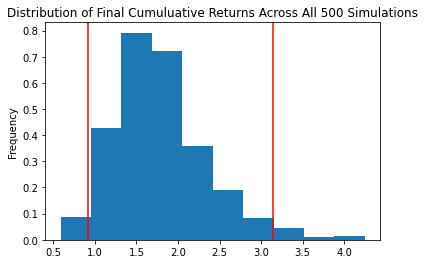

In [46]:
# Plot probability distribution and confidence intervals
dist_plot_5y = Shares_portfolio_5y.plot_distribution()

In [47]:
# Fetch summary statistics from the Monte Carlo simulation results
Shares_portfolio_5y_tbl = Shares_portfolio_5y.summarize_cumulative_return()

# Print summary statistics
print(Shares_portfolio_5y_tbl)

count           500.000000
mean              1.788827
std               0.560669
min               0.586480
25%               1.415694
50%               1.717838
75%               2.057184
max               4.249281
95% CI Lower      0.922128
95% CI Upper      3.143323
Name: 1260, dtype: float64


In [36]:
# Set initial investment
initial_investment = 20000 * 3

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
Shares_portfolio_5y_tbl_lower = round(Shares_portfolio_5y_tbl[8]*initial_investment,2)
Shares_portfolio_5y_tbl_upper = round(Shares_portfolio_5y_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${Shares_portfolio_5y_tbl_lower} and ${Shares_portfolio_5y_tbl_upper}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $62108.18 and $162182.16


* initial_investment = 60000

** Shares_portfolio_5y_tbl_lower = $62108.18

** Shares_portfolio_5y_tbl_upper = $162182.16

### Ten Years Retirement Option

In [48]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
num_sims = 500

Shares_portfolio_10y = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.30,.70],
    num_simulation = num_sims,
    num_trading_days = 252*10)

In [49]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
Shares_portfolio_10y.portfolio_data.head()

AGG                                      \
                             open     high       low   close   volume   
time                                                                    
2016-01-21 00:00:00-05:00  109.08  109.080  108.7400  108.78  6927926   
2016-01-22 00:00:00-05:00  108.72  108.850  108.5850  108.82  2980878   
2016-01-25 00:00:00-05:00  108.95  108.980  108.7700  108.79  3120189   
2016-01-26 00:00:00-05:00  108.90  108.995  108.7699  108.90  2023631   
2016-01-27 00:00:00-05:00  108.91  109.010  108.7200  108.95  1531148   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2016-01-21 00:00:00-05:00          NaN  186.21  188.87  184.64  186.68   
2016-01-22 00:00:00-05:00     0.000368  189.78  190.76  188.88  190.49   
2016-01-25 00:00:00-05:00    -0.000276  189.93  190.15  187.41  187.66   
2016-01-26 00:00:00-05:00     0.001011  188.42  190.53  188.02  190.18   
2016-01-27 00:00:00-05:00     0.000459  189.58  191.56  187.06  188.12   

                                                   
                              volume daily_return  
time                                               
2016-01-21 00:00:00-05:00  154918462          NaN  
2016-01-22 00:00:00-05:00  132418951     0.020409  
2016-01-25 00:00:00-05:00   99219694    -0.014856  
2016-01-26 00:00:00-05:00  115312517     0.013429  
2016-01-27 00:00:00-05:00  157060622    -0.010832

In [50]:
# Plot simulation outcomes
Shares_portfolio_10y.calc_cumulative_return() 

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998272,1.004157,0.994483,1.005085,0.992106,0.989893,1.002109,1.000396,0.996820,0.983206,...,0.994482,1.009420,0.995760,1.008172,1.000229,1.007545,1.000520,1.002312,1.002232,0.995080
2,0.997419,0.996727,0.987248,0.990309,0.993531,0.989537,1.007222,1.007881,1.001273,0.990133,...,0.996942,1.014503,0.979009,1.002874,0.988882,1.004318,1.011709,1.014204,0.999161,0.998721
3,0.989373,1.010374,0.977172,0.999709,0.997566,0.990846,0.994604,1.033801,0.994298,0.989746,...,0.997495,1.013159,0.980504,1.000918,0.977404,1.002246,1.005500,1.022413,1.004886,0.988284
4,0.994463,1.003755,0.959963,1.011223,0.998651,1.005260,1.007580,1.037684,0.989342,0.988793,...,0.992507,1.003004,0.995154,1.019365,0.982321,1.012579,1.003581,1.036734,0.997182,0.977344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.080860,3.294802,4.704170,4.591421,3.827671,3.281039,4.701300,3.932470,2.656542,2.469191,...,1.883324,2.677083,2.119990,3.594082,1.881677,3.739881,2.783603,2.264225,2.244794,2.163597
2517,2.090100,3.288275,4.747934,4.605404,3.875176,3.237182,4.672910,3.964105,2.674187,2.483255,...,1.875832,2.712038,2.098498,3.633926,1.868992,3.767601,2.783797,2.287886,2.247766,2.156469
2518,2.075887,3.304180,4.746903,4.624768,3.847893,3.237275,4.684144,3.997978,2.653457,2.455578,...,1.874076,2.746622,2.107389,3.670651,1.842971,3.786739,2.839427,2.262554,2.263475,2.141421
2519,2.099069,3.285564,4.793843,4.679524,3.897183,3.249706,4.729824,4.031157,2.642100,2.473279,...,1.874097,2.720415,2.121181,3.650689,1.852072,3.756899,2.874333,2.266127,2.274700,2.134751


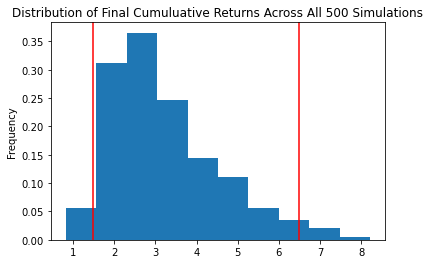

In [51]:
# Plot probability distribution and confidence intervals
dist_plot_10y = Shares_portfolio_10y.plot_distribution()

In [52]:
# Fetch summary statistics from the Monte Carlo simulation results
Shares_portfolio_10y_tbl = Shares_portfolio_10y.summarize_cumulative_return()

# Print summary statistics
print(Shares_portfolio_10y_tbl)

count           500.000000
mean              3.226578
std               1.321361
min               0.824719
25%               2.236090
50%               2.965730
75%               3.957663
max               8.215221
95% CI Lower      1.478306
95% CI Upper      6.492728
Name: 2520, dtype: float64


In [53]:
# Set initial investment
initial_investment = 20000 * 3

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
Shares_portfolio_10y_tbl_lower = round(Shares_portfolio_10y_tbl[8]*initial_investment,2)
Shares_portfolio_10y_tbl_upper = round(Shares_portfolio_10y_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${Shares_portfolio_10y_tbl_lower} and ${Shares_portfolio_10y_tbl_upper}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $88698.37 and $389563.69


* initial_investment = 60000

** Shares_portfolio_10y_tbl_lower = $88698.37

** Shares_portfolio_10y_tbl_upper = $389563.69

# Summary

#### Part 1: Personal Finance Planner
The first will be a personal finance planner that will allow users to visualize their savings composed by investments in shares and cryptocurrencies *to assess if they have enough money as an emergency fund*.

The current value for every union member's Savings Portfolio 

* **Crypto currencies:** 

** 1.2 BTC = $38077.20 

** 5.3 ETH = $7140.58

** Total in Cryptocurrencies = $45217.78


* **Stocks and Bonds:**

** 50 shares of SPY =$19,210.00 

** 200 shares ofAGG = $23452.00

** Total in Stocks and Bonds = $42662.0 


* **The total amount of savings = $87879.78**

* **Emergency fund = $36000.00**

** The current Total Value for the Savings Portfolio is over passing the Goal for the Emergency fund of 3 months of  salary. 

* **With this result we can conclude the investment in a diversified market was good advice and helped the members of the union to enhance their financial health, and have more money than the emergency fund.**




_____________________________________________________________________________

#### Part 2: Personal Finance Planner
The second tool will be a retirement planning tool that will use the Alpaca API to fetch historical closing prices for a retirement portfolio composed of stocks and bonds, then run Monte Carlo simulations to project the portfolio performance at 30 years. You will then use the Monte Carlo data to calculate the expected portfolio returns given a specific initial investment amount.

* For the first retirement option, we have an Weight Investment Distribution: 60% SPY & 40% AGG for 30 years with 2 different initial investments:

* initial_investment = 20000

** Shares_portfolio_30y_tbl_lower = $112379.88

** Shares_portfolio_30y_tbl_upper = $1189679.27

* initial_investment = 30000

** Shares_portfolio_30y_tbl_lower = $168569.83 

** Shares_portfolio_30y_tbl_upper = $1784518.91

**Since Weight Investment Distribution (60% SPY & 40% AGG) is the same in both cases, the ratio investment/earnings  is linear, as big is initial investment as big the earnings you get. With that said, I would recommend an Initial Investment of $30000.00, due the earnings is about 50% more.


_____________________________________________________________________________________________________________________________________

### Optional Challenge - Early Retirement

* To adjust the retirement plan for an earlier than normal retirement I evaluated 2 options for a 5 years early retirement: 


* Option 1: initial_investment = 60000 , Investment distribution: 60% SPY & 40% AGG

** Shares_portfolio_5y_tbl_lower = $60752.12

** Shares_portfolio_5y_tbl_upper = $156270.84

* Option 2: initial_investment = 60000 , Investment distribution: 70% SPY & 30% AGG

** Shares_portfolio_5y_tbl_lower = $62108.18

** Shares_portfolio_5y_tbl_upper = $162182.16

Increasing the risk did not offer a major enhance for earning for a 5 years Portfolio. I do not recommend taking the second option. I will go conservative keeping option 1: initial_investment = 60000 , Investment distribution: 60% SPY & 40% AGG.

* To adjust the retirement plan for an earlier than normal retirement I evaluated 2 options for a 10 years early retirement: 

* Option 1: initial_investment = 60000  , Investment distribution: 60% SPY & 40% AGG

** Shares_portfolio_10y_tbl_lower = $78,913.61

** Shares_portfolio_10y_tbl_upper = $312,939.65

* Option 2: initial_investment = 60000 , Investment distribution: 70% SPY & 30% AGG

** Shares_portfolio_10y_tbl_lower = $88698.37

** Shares_portfolio_10y_tbl_upper = $389563.69

Increasing the risk did offer a major enhance in earning for a 10 years Portfolio. I do recommend to take option 2: initial_investment = 60000 ,  Investment distribution: 70% SPY & 30% AGG.

We can see in these options time is the major factor affecting the final results. As longer the time for the portfolio, the bigger the earnings.

To sum it up, my final recommendation for an Early Retirement is Option 2 (initial_investment = $60000, Weight Investment Distribution: 70% SPY & 30% AGG).